In [0]:
import os ; os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/Unsupervised Learning')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmeans import plot_k_means, get_simple_data
from datetime import datetime

In [0]:
def get_data(limit=None):
    print("Reading in and transforming data..")
    df = pd.read_csv('train.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 #normalizing data
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

In [0]:
#hard labels
def purity2(Y, R):
    #maximum purity is 1, higher is better
    C = np.argmax(R, axis=1) #cluster assigments, take the max. responsibility as its cluster

    N = len(Y) #number of data points
    K = len(set(Y)) #number of labels

    total = 0.0
    for k in range(K):
        max_intersection = 0
        for j in range(K):
            intersection = ((C==k) & (Y==j)).sum()
            if intersection > max_intersection:
                max_intersection = intersection

        total += max_intersection
    return total / N

In [0]:
def purity(Y, R):
    #maximum purity is 1, higher is better
    N, K = R.shape
    p = 0
    for k in range(K):
        best_target = -1 #we don't strictly need to store this
        max_intersection = 0 
        for j in range(K):
            intersection = R[Y==j, k].sum()
            if intersection > max_intersection:
                max_intersection = intersection
                best_target = j
        p += max_intersection
    return p / N        

In [0]:
#hard labels
#Davies-Bouldin index calculation
def DBI2(X, R):
    N, D = X.shape
    _, K = R.shape

    #get sigmas, means first
    sigma = np.zeros(K)
    M = np.zeros((K, D))
    assignments = np.argmax(R, axis=1)
    for k in range(K):
        Xk = X[assignments == k]
        M[k] = Xk.mean(axis=0)
        n = len(Xk)
        diffs = Xk - M[k]
        sq_diffs = diffs * diffs 
        sigma[k] = np.sqrt(sq_diffs.sum() / n)

    #calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio

    return dbi / K

In [0]:
def DBI(X, M, R):
    #ratio between (sum of std deviation between 2 clusters) / (distance between cluster means)
    #lower is better
    N, D = X.shape
    K, _ = M.shape

    #get sigmas first
    sigma = np.zeros(K)
    for k in range(K):
        diffs = X - M[k] #should be NxD
        squared_distances = (diffs * diffs).sum(axis=1) #now just N
        weighted_squared_distances = R[:,k] * squared_distances
        sigma[k] = np.sqrt(weighted_squared_distances.sum() / R[:,k].sum())

    # calculate Davies-Bouldin Index
    dbi = 0 
    for k in range(K):
        max_ratio = 0 
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio

        dbi += max_ratio
    
    return dbi / K

In [0]:
def main():
    #mnist data
    X, Y = get_data(10000)

    print("Number of data points:", len(Y))
    M, R = plot_k_means(X, len(set(Y)))

    print("Purity:", purity(Y, R))
    print("Purity 2 (hard clusters):", purity2(Y, R))
    print("DBI:", DBI(X, M, R))
    print("DBI 2 (hard clusters):", DBI2(X,R))

    #plot the mean images 
    #they should look like images
    for k in range(len(M)):
        im = M[k].reshape(28, 28)
        plt.imshow(im, cmap='gray')
        plt.show()

Reading in and transforming data..
Number of data points: 10000
Final cost 393843.88877119793
Purity: 0.5692165217052084
Purity 2 (hard clusters): 0.5695
DBI: 2.8851877861574393
DBI 2 (hard clusters): 2.8849154562758264


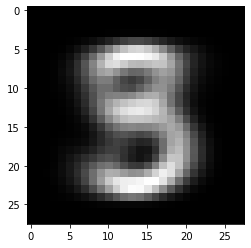

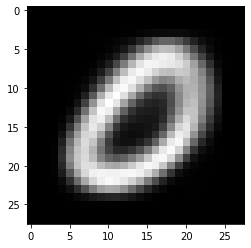

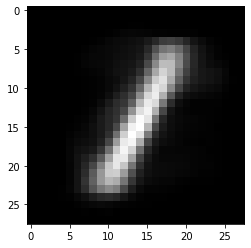

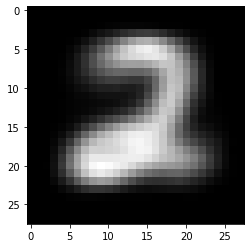

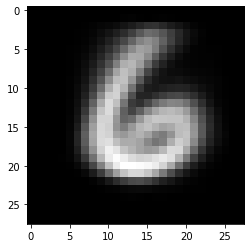

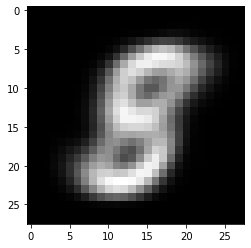

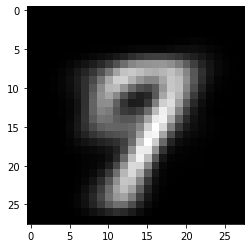

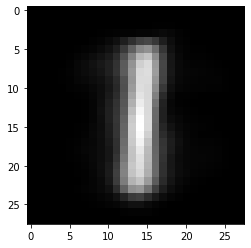

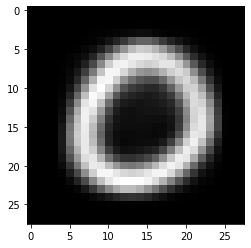

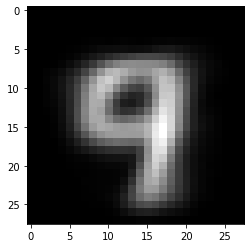

In [20]:
if __name__=='__main__':
    main()